# Introduction

### Goal
You are working in a retail company, and being asked by your boss to find insight to use for devloping new marketing campaign

# Exploratory Data Analysis

## Dataset

In [77]:
# Setup

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

In [78]:
# Load data from marketing_data.csv
df = pd.read_csv('../dataset/marketing_data.csv', header=0)

Let's take a look from the dataset

In [79]:
# View the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

There is missing data on "Income"

Let's take a look in table format

In [80]:
# View the first 5 column
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


From the dataset we should:
1. Eliminate whitespace in column names
2. Transform "Income" to numerical
3. Transform "Dt_Customer" to datetime
4. Dealing with null value
5. Dealing with outlier

In [81]:
# Clean up column names that contain whitespace
df.columns = df.columns.str.replace(' ', '')

In [82]:
# Transform 'Income' to numeric format
df['Income'] = df['Income'].str.replace('$','')
df['Income'] = df['Income'].str.replace(',','').astype('float')

In [83]:
# Transform 'Dt_Customer' to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')

Let's recheck

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Done!

## Dealing with missing data
There are only 24/2240 = 1% null value so we could do imputation instead of drop it

Next, imputation is fill the value with most appropriate value, for MCAR we usually use the value that least effect the mathermatic model which is the center of a set of data or central tensency

Next, we have 4 imputation strategy
1. mean: if data is in normal distribution form
2. median: if data is skew or including outlier
3. mode: if data is skew or including outlier it is applicable for catagorical data
4. constant: if you know what exactly number to include

Next, we plot the data to visulize the distribution of the dataset

/var/folders/3t/xfpgj4cx36x99cwhqh55n25w0000gp/T/ipykernel_5742/2867249955.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'], kde=False, hist=True)


Text(0, 0.5, 'count')

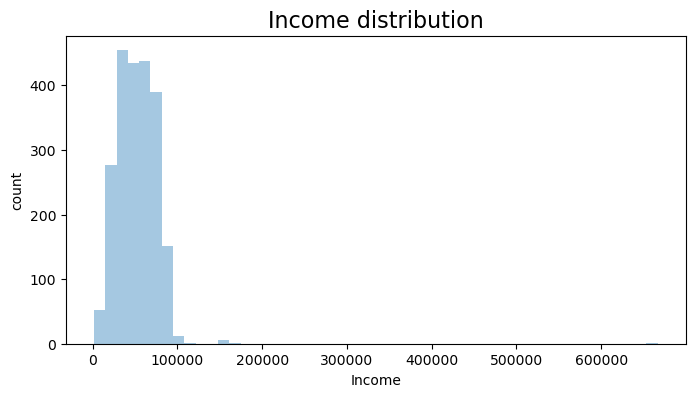

In [85]:
plt.figure(figsize=(8,4))
sns.distplot(df['Income'], kde=False, hist=True)
plt.title('Income distribution', size=16)
plt.ylabel('count')

<Axes: >

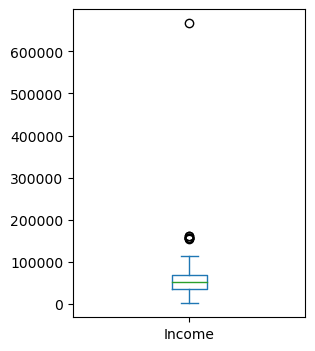

In [86]:
df['Income'].plot(kind='box', figsize=(3,4))

The dataset has sligly left skewed and a few outlier

We decide to use median imputation strategy

In [87]:
# Median imputation
df['Income'] = df['Income'].fillna(df['Income'].median())

## Outliers

Next, we are going to deal with outliers

Let's use **Box plot** to visualize the data

In [88]:
# Select only numeric data
df_numeric = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

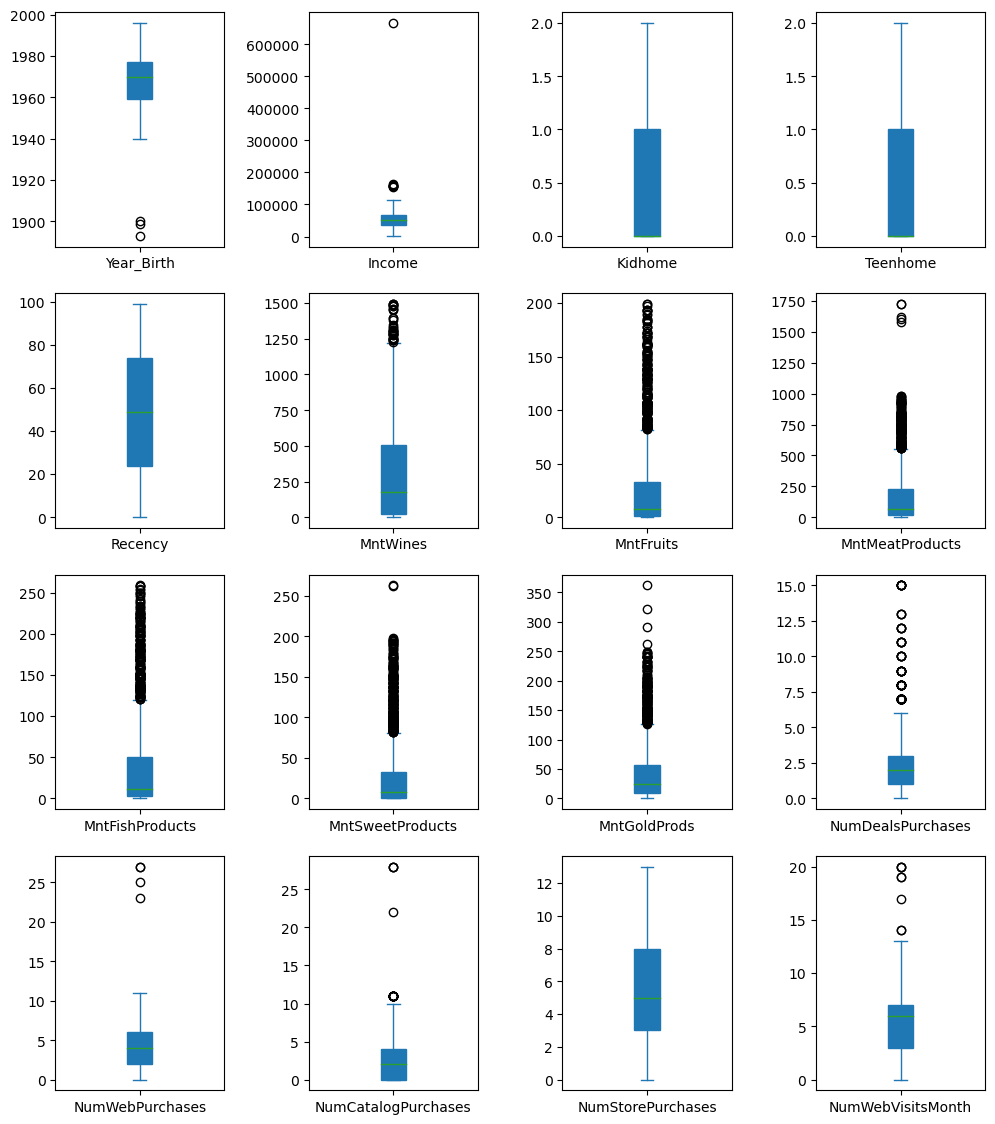

In [89]:
df_numeric.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5)

Droping row for people who born before 1900, hence it is low chances that people would lives longer than 123 years, this would be data entry error.

In [90]:
pd.value_counts(df['Year_Birth'] <= 1900)

Year_Birth
False    2237
True        3
Name: count, dtype: int64

<Axes: >

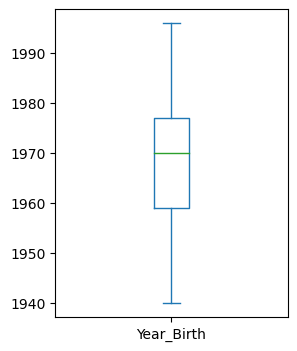

In [91]:
# Drop outlier and reset index
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)

df['Year_Birth'].plot(kind='box', figsize=(3,4))

## Feature engineering

- Total family member ('TotalFamilyMember') from sum of Kidhome, Teenhome and marriage status
- The year of becoming a customer ('Year_Customer') from 'Dt_Customer'
- Years since becoming a customer ('Years_Customer')
- Total amount spent ('TotalMnt')
- Total purchases ('TotalPurchase')
- Total of campaigns accepted ('TotalCampaignAccept')

In [101]:
(df['Marital_Status'] in ['Together', 'Married'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [98]:
df['Marital_Status']

0       Divorced
1         Single
2        Married
3       Together
4         Single
          ...   
2232    Divorced
2233     Married
2234    Divorced
2235     Married
2236     Married
Name: Marital_Status, Length: 2237, dtype: object

For more than this, we might use all combination and see the correationship, then work backward to make assumption

In [ ]:
# Dependents
df['TotalFamilyMember'] = df['Kidhome'] + df['Teenhome'] + df[]

# Year becoming a Customer
df['Year_Customer'] = pd.DatetimeIndex(df['Dt_Customer']).year

# Total Amount Spent
mnt_cols = [col for col in df.columns if 'Mnt' in col]
df['TotalMnt'] = df[mnt_cols].sum(axis=1)

# Total Purchases
purchases_cols = [col for col in df.columns if 'Purchases' in col]
df['TotalPurchases'] = df[purchases_cols].sum(axis=1)

# Total Campaigns Accepted
campaigns_cols = [col for col in df.columns if 'Cmp' in col] + ['Response'] # 'Response' is for the latest campaign
df['TotalCampaignsAcc'] = df[campaigns_cols].sum(axis=1)

# view new features, by customer ID
df[['ID', 'Dependents', 'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc']].head()